# Introduction: Predicting Personal Loan Acceptance

In the highly competitive banking sector, identifying potential customers for personal loans is a critical strategy for increasing asset-based revenue. While most retail bank customers maintain basic deposit accounts, only a small fraction opt for personal loans. The challenge for a bank lies in efficiently targeting the right individuals—those with the highest probability of conversion—to minimize marketing costs and maximize the success rate of their campaigns.

**Project Objective**
The goal of this project is to build a predictive model using Logistic Regression to identify the underlying patterns that distinguish loan acceptors from non-acceptors. By analyzing demographic information and financial behaviors, the bank can transition from mass marketing to a more surgical, data-driven approach.

**Dataset Overview**
The dataset consists of 5,000 observations representing bank customers, featuring a mix of demographic data, relationship details with the bank, and their response to previous personal loan campaigns.

**Key Features Include:**

- Demographics: Age, Experience, Family size, and ZIP Code.

- Financial Profile: Annual Income, Average Credit Card spending (CCAvg), and Mortgage value.

- Bank Relationship: Presence of a Securities Account, CD Account, Online banking usage, and whether they hold a CreditCard issued by the bank.

- Education Level: Categorized from Undergrad (1) to Advanced/Professional (3).

- The Target Variable is Personal Loan, a binary indicator where:

1: The customer accepted the personal loan offered in the last campaign.

0: The customer did not accept the loan.

**Why Logistic Regression?**
Logistic Regression is the ideal statistical method for this problem because our outcome is categorical (Yes/No). Unlike Linear Regression, which predicts continuous values, Logistic Regression uses the Sigmoid function to map any real-valued number into a probability between 0 and 1.

By the end of this analysis, we aim to provide the bank with a robust model that can rank customers by their likelihood of taking a loan, allowing for a more effective and profitable marketing strategy.

### Import libraries

In [1]:
# Comment our this code if not needed
# %pip install -r requirements.txt

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


### Import the data and load to dataframe

In [3]:
# import the data
data = pd.read_csv('data/dataset.csv')
# make data Frame
df = pd.DataFrame(data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Convert CCAvg from String to Float

In [4]:
df['CCAvg'] = df['CCAvg'].astype(str).str.replace('/', '.')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Experience cannot be negative integer
Using Absolute function to convert all negative values to positive only  

In [5]:
df.Experience = abs(df.Experience)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Null value check

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The dataset has no null values

### Correlation

In [7]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


### Correlation plot

The sns.clustermap() function is more than just a visualization; it is a critical diagnostic tool for understanding the relationships between your features (like Income, Age, and Experience) before training your Logistic Regression model.

Here is why we use it:

- Identifies Multicollinearity: Logistic Regression assumes that independent variables are not highly correlated with each other. If variables like Age and Experience are nearly identical (highly correlated), it can destabilize your model's coefficients. The clustermap makes these clusters of redundant variables instantly visible.

- Reveals Hidden Patterns: Unlike a standard heatmap, a Clustermap uses hierarchical clustering to reorder the rows and columns. It groups variables that behave similarly, helping you see "blocks" of related features (e.g., wealth indicators like Income, CCAvg, and Mortgage often cluster together).

- Feature Selection: By looking at the Personal Loan row, you can quickly identify which features have the strongest linear relationship with your target, helping you decide which predictors are most likely to be significant in your model.

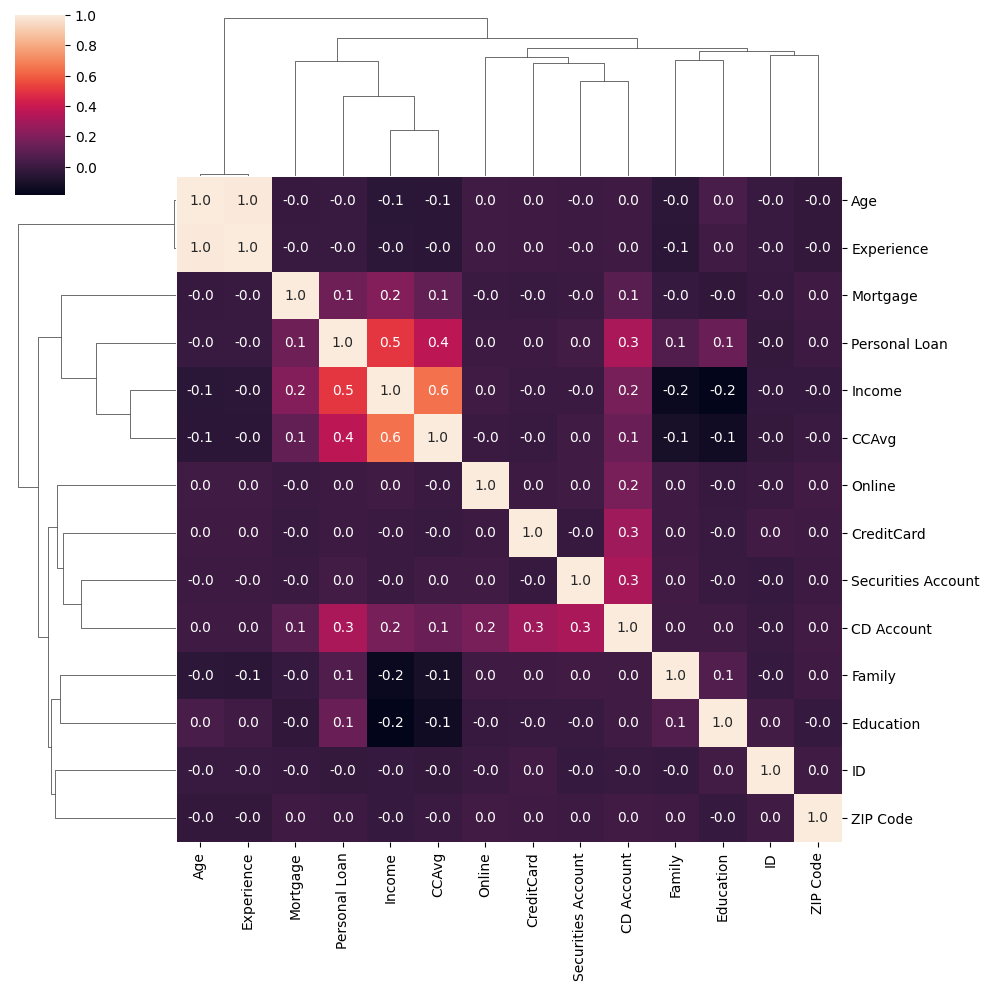

In [8]:
sns.clustermap(df.corr(),annot=True, fmt=".1f")

### Univariate and Bivariate Exploratory Data Analysis (EDA)

This code is performing Univariate and Bivariate Exploratory Data Analysis (EDA). Specifically, it is automating the creation of visual distributions for every potential predictor in your dataset.


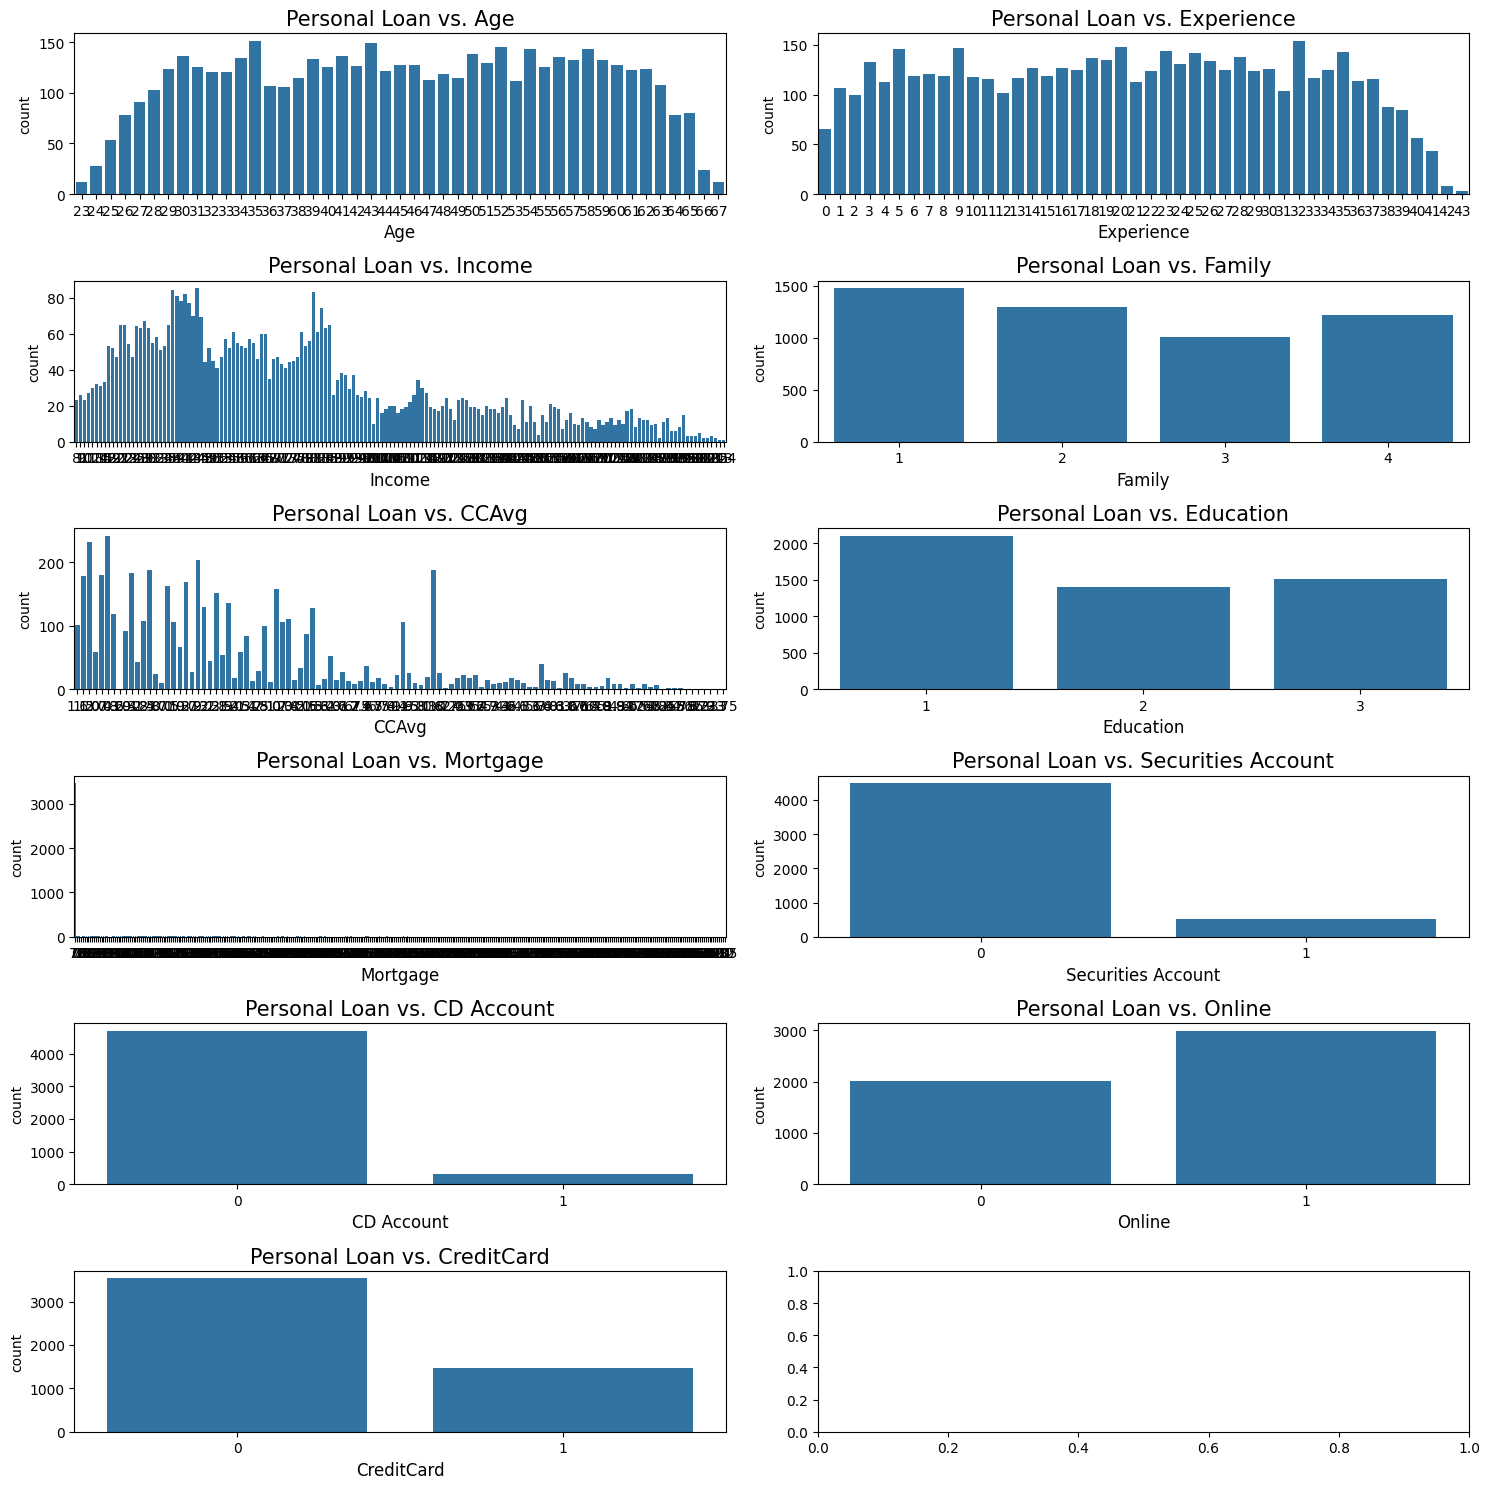

In [9]:
featuresAndTarget = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account'
                     ,'CD Account' ,'Online' , 'CreditCard' ]
features = ['Age',
            'Experience',
            'Income',
            'Family',
            'CCAvg',
            'Education',
            'Mortgage',
            'Securities Account',
            'CD Account',
            'Online',
            'CreditCard']

target = 'Personal Loan'

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i in range(len(features)):
    x = i//2
    y = i%2
    sns.countplot(x=features[i] , data=df , ax=ax[x,y])
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)

plt.tight_layout()

### Personal Loan

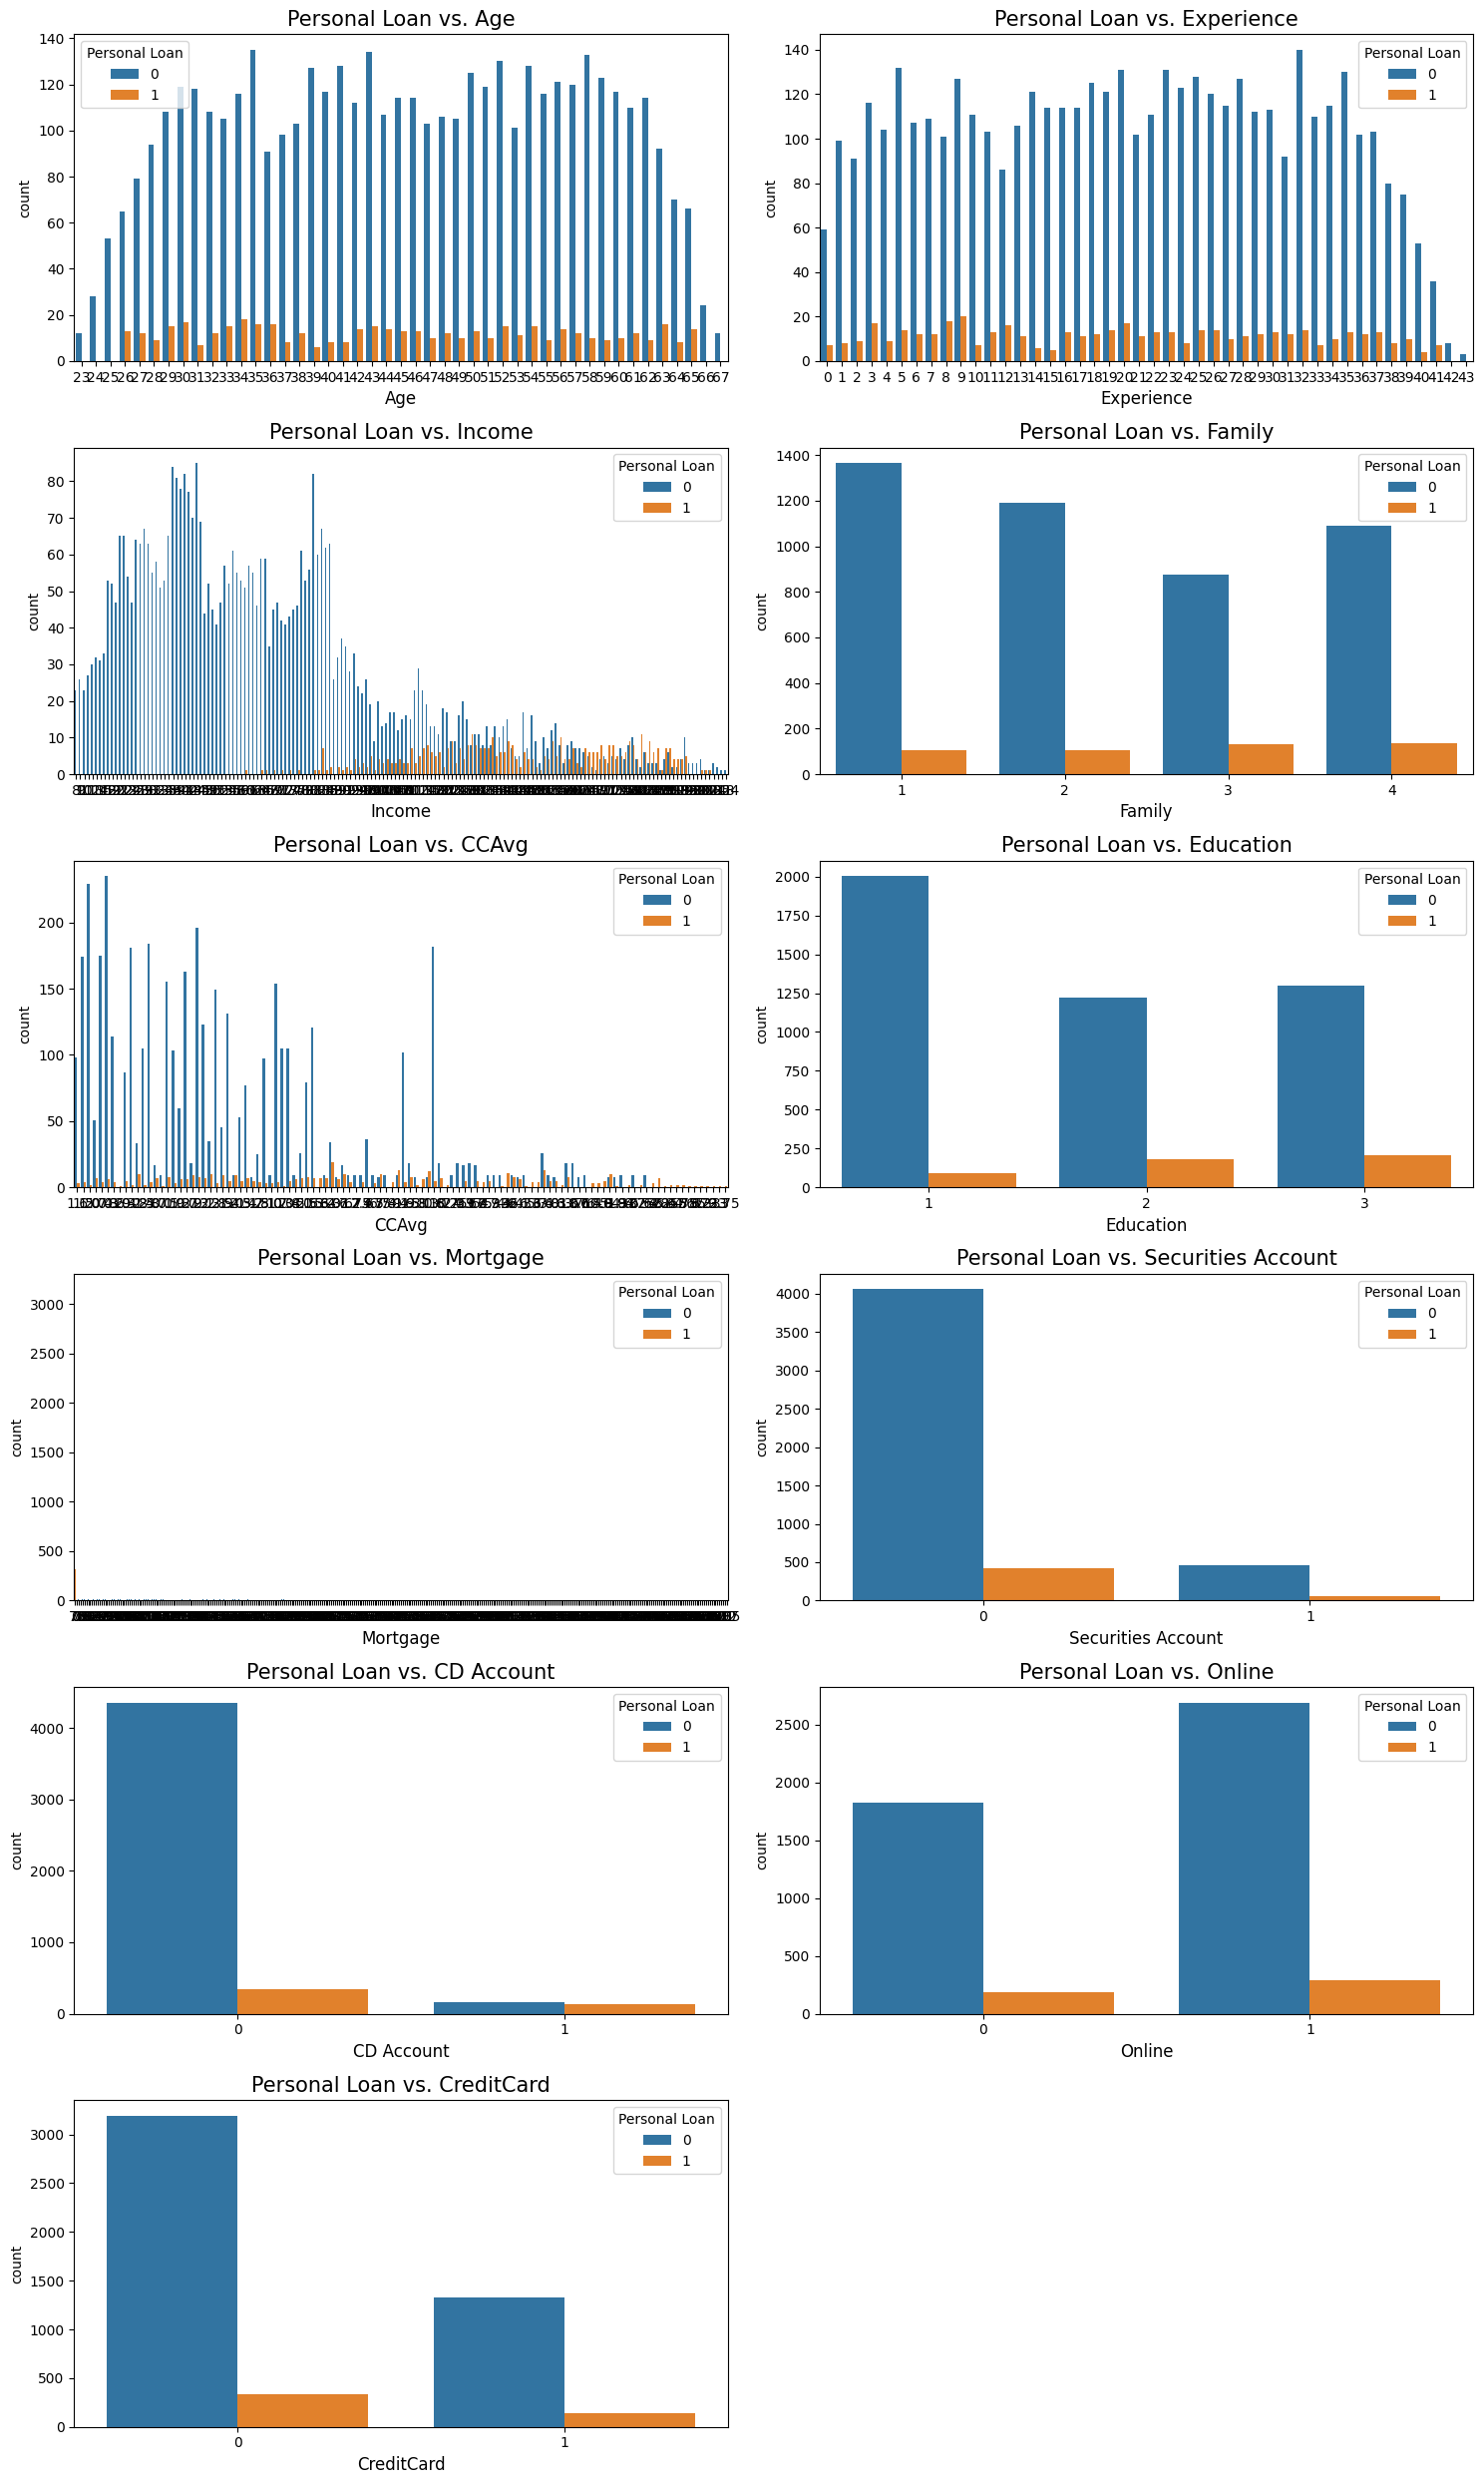

In [10]:

# Setup Plotting Variables
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 
            'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
target = 'Personal Loan'

# Visualization: Countplots for all features
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,25), dpi=100)

for i in range(len(features)):
    x = i//2
    y = i%2
    sns.countplot(x=features[i], data=df, hue=target, ax=ax[x,y]) # Added 'hue' to see relationship with target
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)

# Hide the empty 12th subplot
ax[5, 1].axis('off')

plt.tight_layout()
plt.show()



### Model

In [11]:
# Model Preparation
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling & Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Final Evaluation
predictions = lr_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000



### Confusion Matrix Heatmap

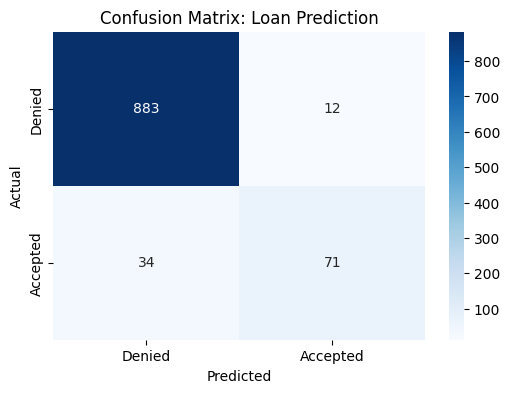

In [12]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Denied', 'Accepted'], yticklabels=['Denied', 'Accepted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Loan Prediction')
plt.show()



### Model Coefficients (Feature Importance)


/tmp/ipykernel_60565/4274120414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Feature', data=importance, palette='viridis')


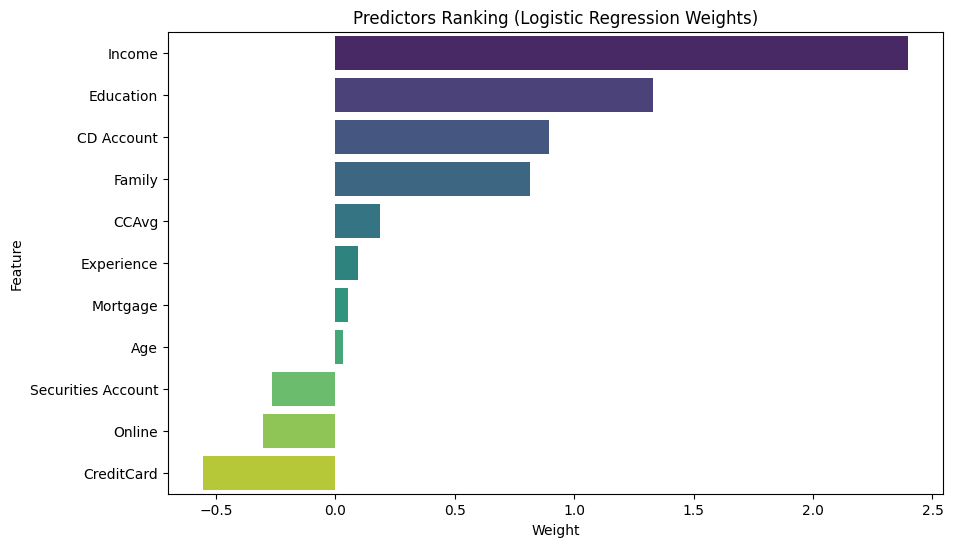

In [13]:
# Model Coefficients (Feature Importance)
importance = pd.DataFrame({'Feature': features, 'Weight': lr_model.coef_[0]})
importance = importance.sort_values(by='Weight', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Feature', data=importance, palette='viridis')
plt.title('Predictors Ranking (Logistic Regression Weights)')
plt.show()

## Conclusion

The Logistic Regression model developed in this project provides a high-accuracy baseline for predicting personal loan acceptance. By analyzing the model coefficients, we identified that Annual Income, Education level, and the presence of a CD Account are the most significant predictors of a customer’s likelihood to accept a loan offer. While the overall accuracy is high, the model's performance is heavily influenced by the class imbalance—as the vast majority of customers do not take out loans. From a business perspective, this model allows the bank to move away from inefficient mass-marketing campaigns and instead target a "high-probability" segment of customers. By prioritizing individuals with higher income brackets and professional degrees, the bank can significantly increase its conversion rates while reducing unnecessary marketing expenditures.